In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def load_img():
 blank_img = np.zeros((700,700))
 font = cv2.FONT_HERSHEY_COMPLEX
 cv2.putText(blank_img,text='SPARSH', org=(100,200),fontFace=font,fontScale=2,color=(255,255,255),thickness=5)
 return blank_img

In [ ]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [ ]:
img = load_img()

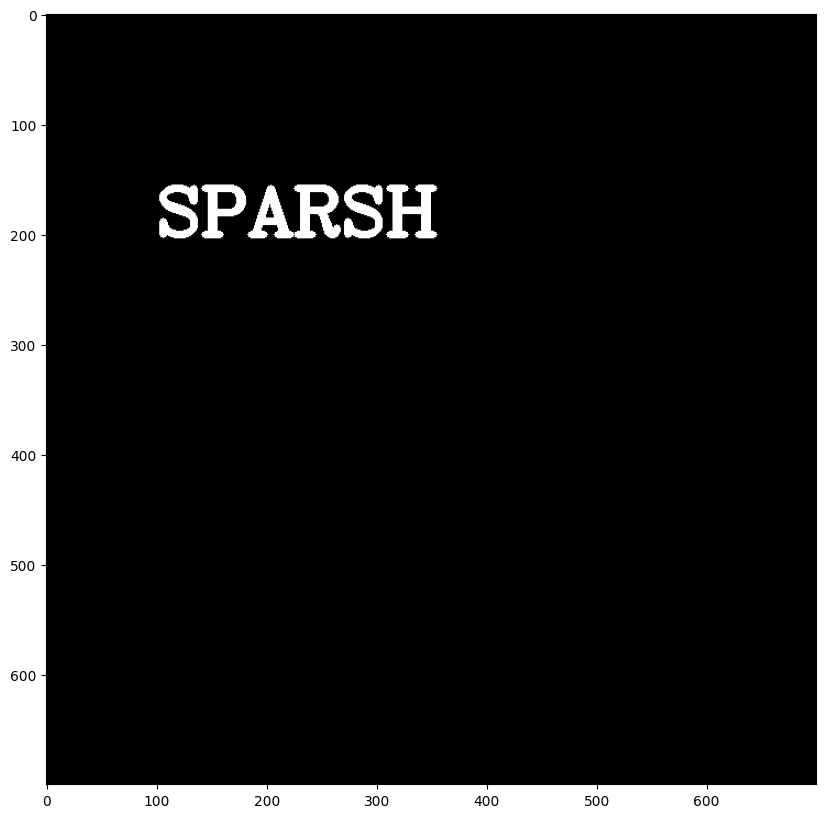

In [ ]:
display_img(img)

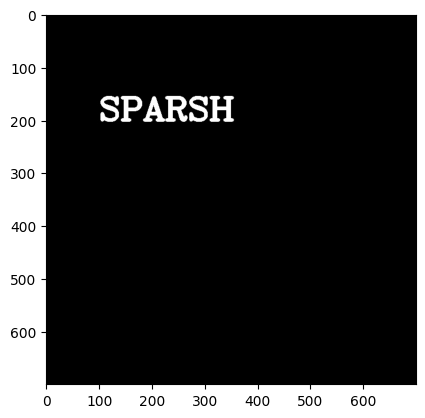

In [ ]:
cv2.imwrite('SPARSH.jpg',img)
im = cv2.imread('SPARSH.jpg',0)
plt.imshow(im,cmap='gray')

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(im,kernel,iterations=1)
erosion2 = cv2.erode(im,kernel,iterations=2)
erosion3 = cv2.erode(im,kernel,iterations=3)

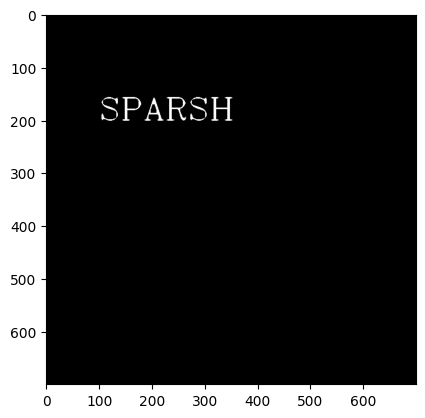

In [ ]:
plt.imshow(erosion1,cmap='gray')

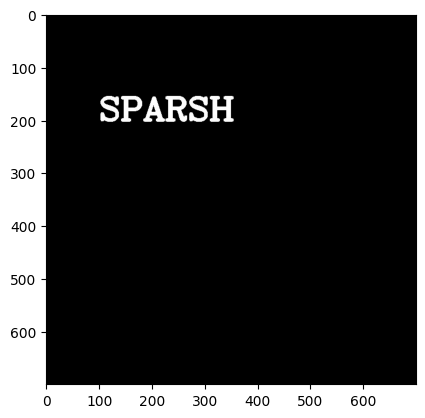

In [ ]:
opening = (cv2.morphologyEx(im,cv2.MORPH_OPEN,kernel))
plt.imshow(opening,cmap='gray')

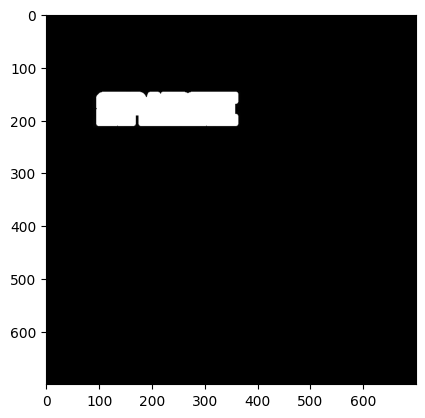

In [ ]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
Dilate5 = cv2.dilate(im,kernel,iterations=4)
plt.imshow(Dilate5,cmap='gray')

In [ ]:
img = load_img()
white_noise = np.random.randint(low=0,high=2,size=(700,700))
white_noise

array([[0, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 1, 1]])

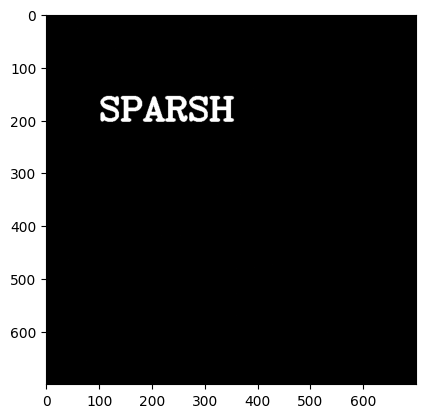

In [ ]:
img.shape
noise_img = white_noise+img
plt.imshow(noise_img,cmap='gray')

In [ ]:
black_noise = np.random.randint(low=0,high=2,size=(700,700))
black_noise

array([[0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 0, 0]])

In [ ]:
black_noise = black_noise*-255
black_noise_img = black_noise+img

In [ ]:
black_noise_img

array([[    0., 65025.,     0., ..., 65025.,     0., 65025.],
       [65025.,     0.,     0., ..., 65025., 65025.,     0.],
       [    0., 65025., 65025., ..., 65025.,     0., 65025.],
       ...,
       [    0., 65025., 65025., ...,     0., 65025.,     0.],
       [65025., 65025., 65025., ...,     0., 65025., 65025.],
       [65025.,     0., 65025., ..., 65025.,     0.,     0.]])

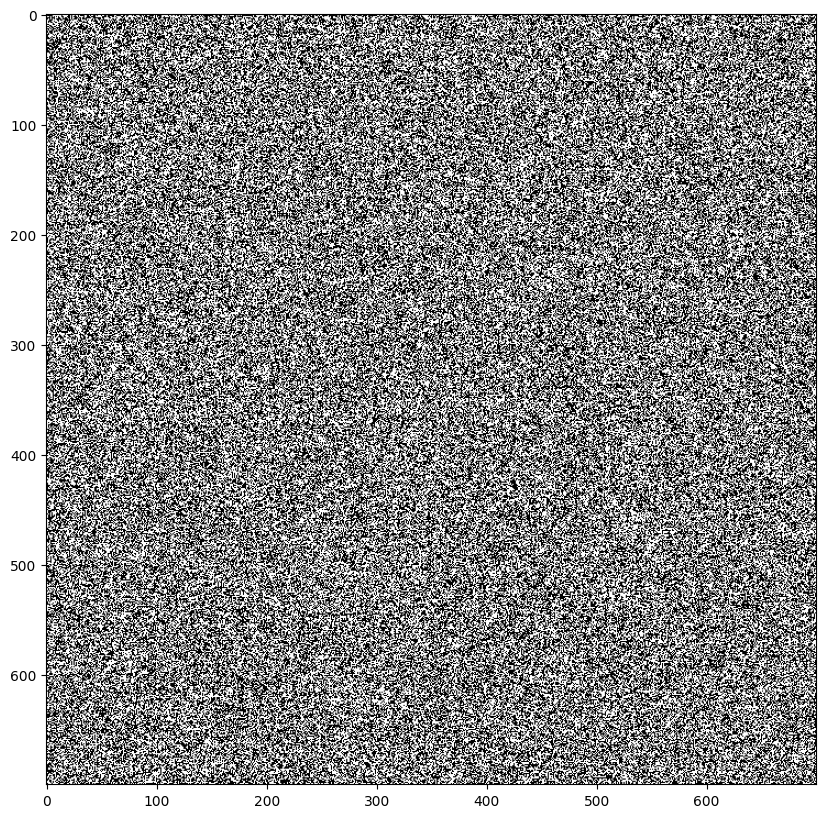

In [ ]:
black_noise_img[black_noise_img==-255]=0
display_img(black_noise_img)

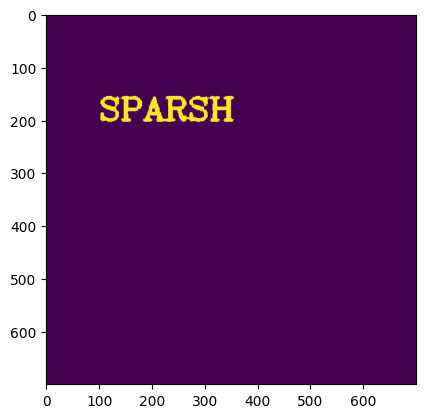

In [ ]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

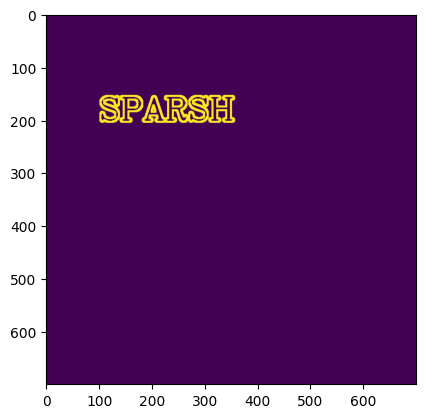

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

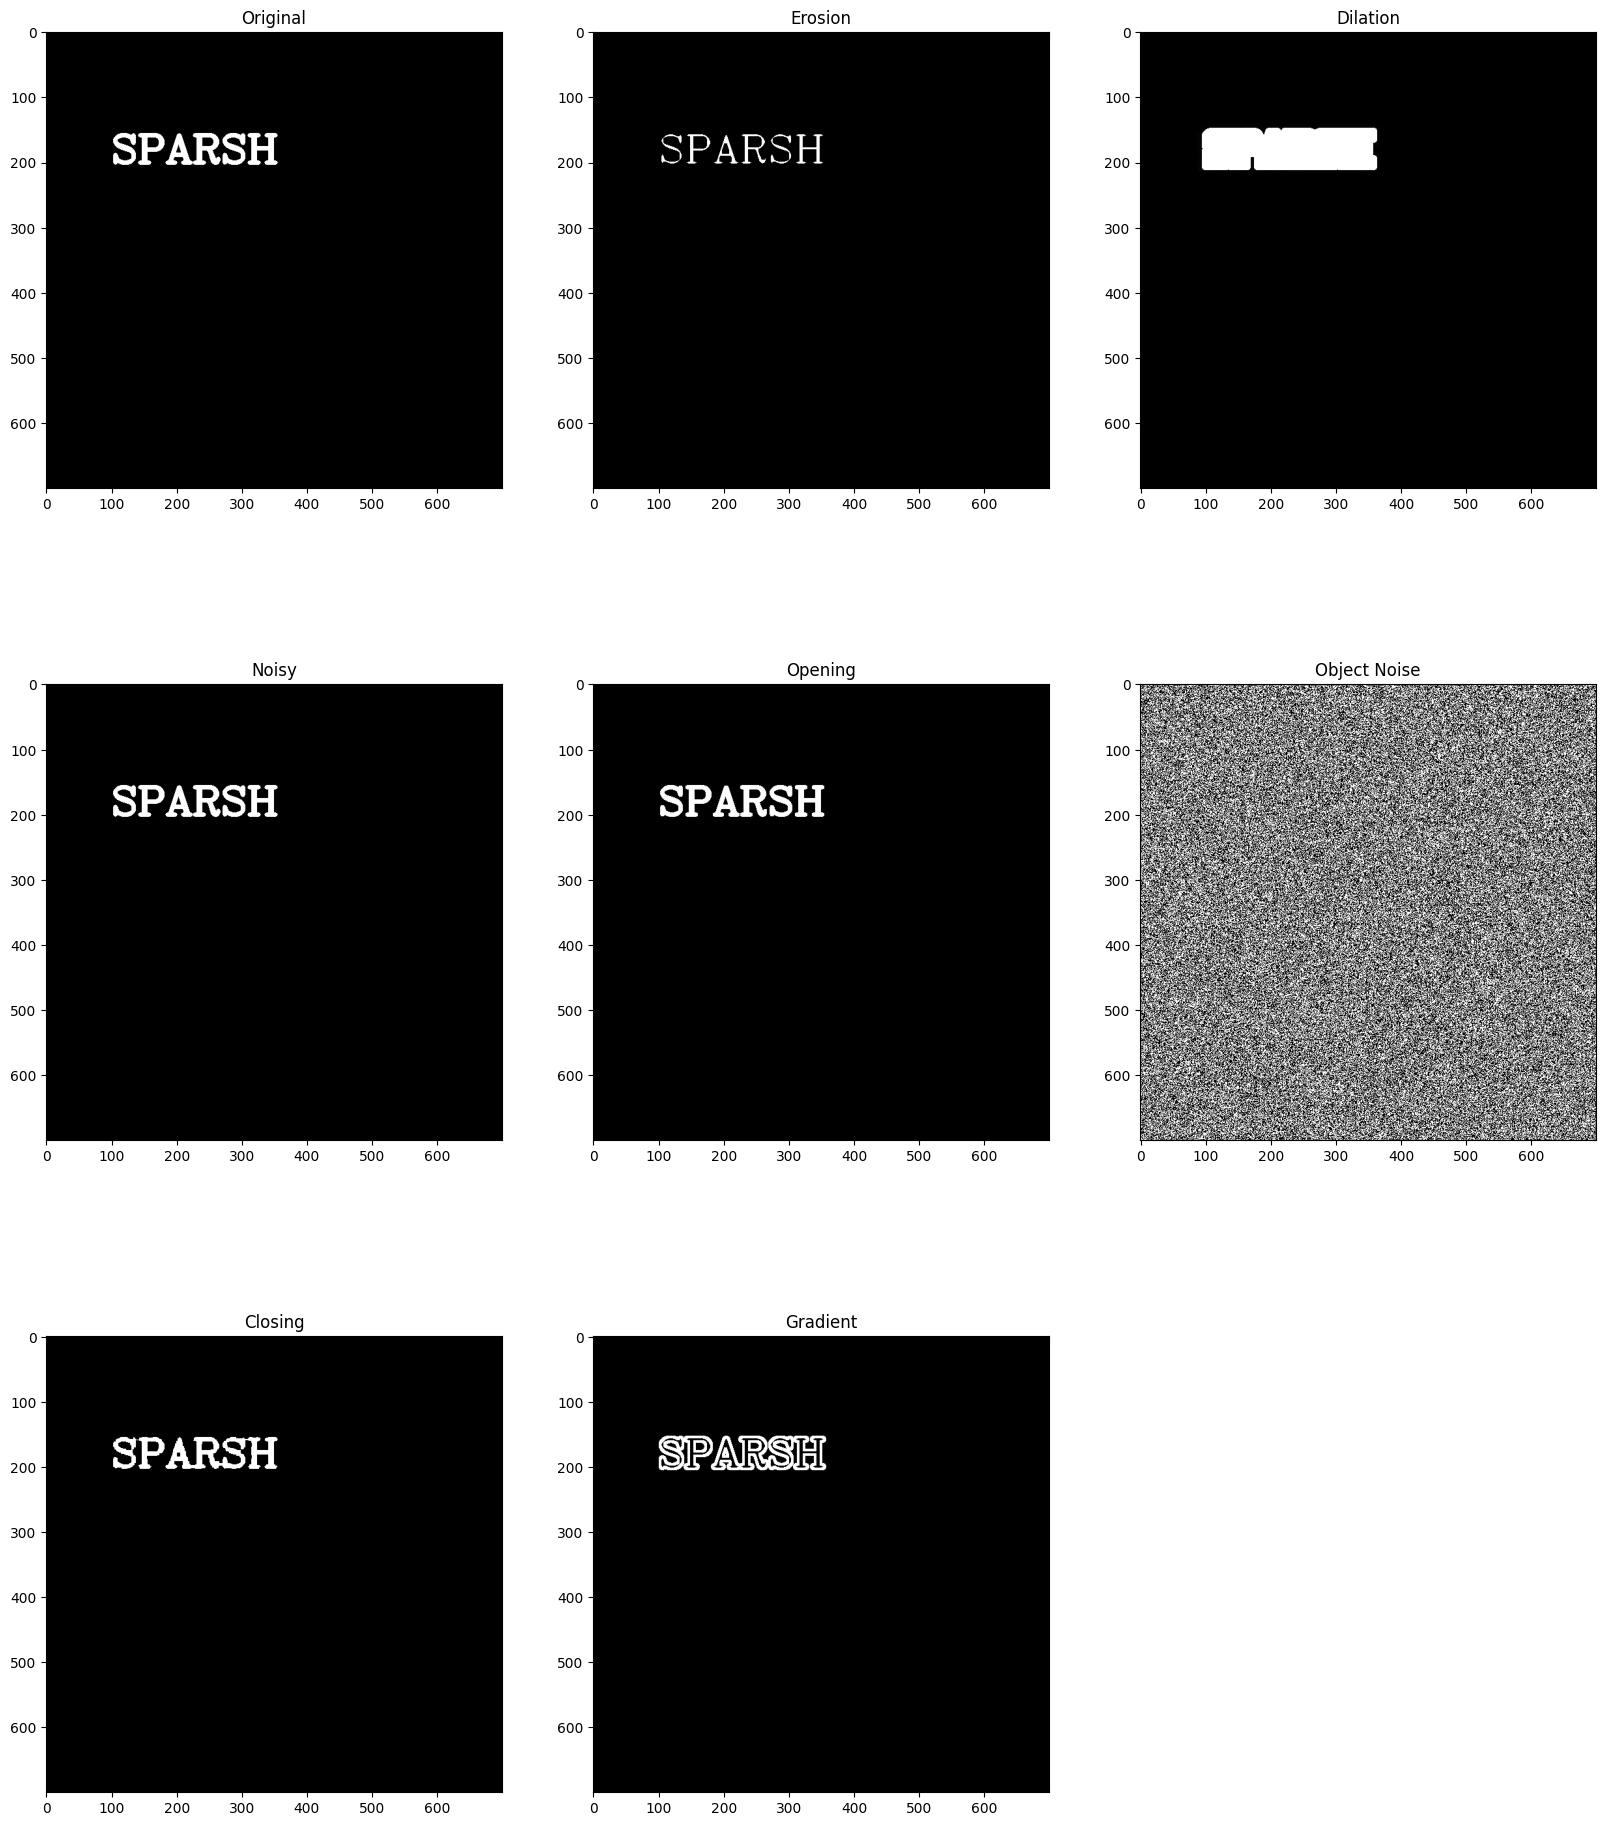

In [ ]:
plt.figure(figsize=(4*5,4.8*5), constrained_layout=False)
plt.subplot(331), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(332), plt.imshow(erosion1,cmap='gray'), plt.title('Erosion')
plt.subplot(333), plt.imshow(Dilate5,cmap='gray'), plt.title('Dilation')
plt.subplot(334), plt.imshow(noise_img,cmap='gray'), plt.title('Noisy')
plt.subplot(335), plt.imshow(opening,cmap='gray'), plt.title('Opening')
plt.subplot(336), plt.imshow(black_noise_img,cmap='gray'), plt.title('Object Noise')
plt.subplot(337), plt.imshow(closing,cmap='gray'), plt.title('Closing')
plt.subplot(338), plt.imshow(gradient,cmap='gray'), plt.title('Gradient')
plt.show()